11214369 - Nguyen Vu Anh Ngoc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from sklearn.decomposition import PCA

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

2024-01-17 15:36:25.133045: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-17 15:36:27.372825: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-17 15:36:27.372916: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-17 15:36:27.724781: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-17 15:36:28.468873: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-17 15:36:28.470371: I tensorflow/core/platform/cpu_feature_guard.cc:1

# Problem 1
Re-implement PCA by using numpy.

In [2]:
class MyPCA:
    def __init__(self, n_components: int):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.is_fitted = False
    
    def fit(self, X):
        # Standardize
        self.mean = np.mean(X, axis=0)
        X_std = X - self.mean

        # Calculate covariance matrix
        cov = np.cov(X_std.T)

        # Calculate eigens
        eigenvalues, eigenvectors = np.linalg.eigh(cov)

        # Sort eigenvectors descending by eigenvalues
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[:, idxs]

        # Store first n eigenvectors
        self.components = eigenvectors[:, :self.n_components]
        
        # Mark as fitted
        self.is_fitted = True

    def transform(self, X):
        # Validate
        if not self.is_fitted:
            raise Exception("Please call fit method before transform.")
        
        # Standardize
        X_std = X - self.mean

        # Project
        return np.dot(X_std, self.components)
        
    def fit_transform(self, X: np.ndarray) -> np.ndarray:
        self.fit(X)
        return self.transform(X)

# Problem 2
Load MNIST dataset
Visualize the image.
Then use PCA to reduce the dimensity of the data. Then visualize all the data.

In [3]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('Data shape:', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Flatten images
X_train = X_train.reshape((-1, 28*28))
X_test = X_test.reshape((-1, 28*28))
print('Data shape:', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Data shape: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Data shape: (60000, 784) (60000,) (10000, 784) (10000,)


In [4]:
# My PCA implementation
my_pca = MyPCA(n_components=2)
my_result_custom = my_pca.fit_transform(X_train)

# Sklearn PCA
sklearn_pca = PCA(n_components=2)
sklearn_result = sklearn_pca.fit_transform(X_train)

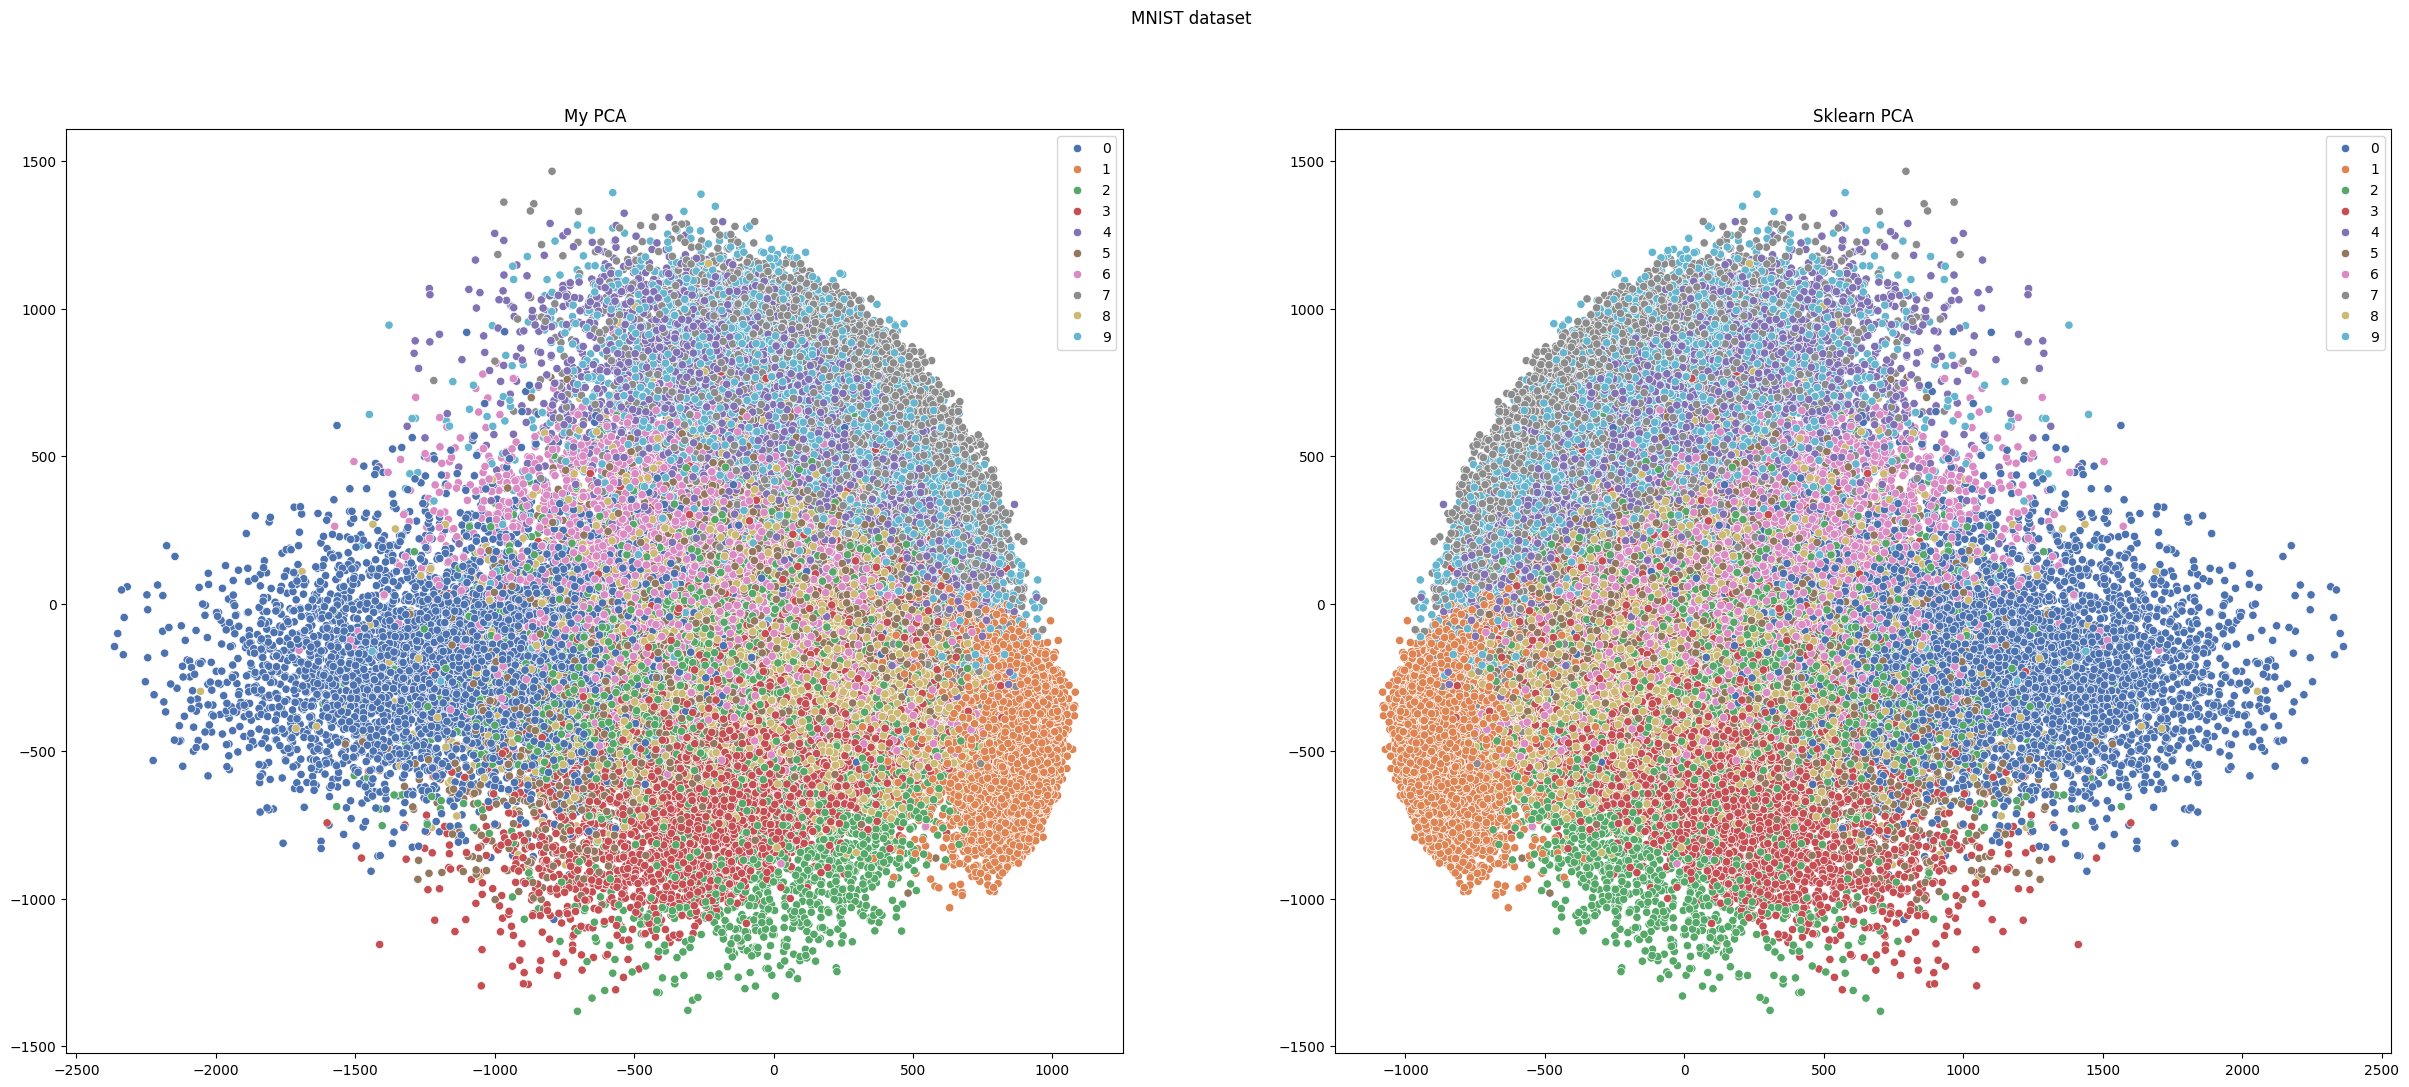

In [5]:
# Plotting and comparing results
fig, ax = plt.subplots(1, 2, figsize=(30, 12))
fig.suptitle('MNIST dataset')
ax[0].set_title('My PCA')
ax[1].set_title('Sklearn PCA')
sns.scatterplot(ax=ax[0], x=my_result_custom[:, 0], y=my_result_custom[:, 1], hue=y_train, palette='deep')
sns.scatterplot(ax=ax[1], x=sklearn_result[:, 0], y=sklearn_result[:, 1], hue=y_train, palette='deep')
plt.show()